In [1]:
import random

In [2]:
# matplotlib notebook
# import matplotlib
# matplotlib.use('TkAgg')

In [1]:
from common import Item
from ortools_models import task_one_model, task_one_model_adapter
from skyline import skyline_decode
from plots import draw_pallet
from metrics import print_efficiency

In [2]:
from data_analys.data_generator import guillotine_cutting

In [4]:
items = [Item(random.randint(1, 5), random.randint(1, 5), random.randint(1, 5)) for _ in range(12)]
items

[Item(3, 3, 1),
 Item(5, 3, 2),
 Item(2, 2, 1),
 Item(4, 3, 2),
 Item(2, 2, 4),
 Item(5, 2, 3),
 Item(5, 4, 1),
 Item(5, 1, 1),
 Item(4, 4, 4),
 Item(3, 1, 2),
 Item(1, 1, 5),
 Item(4, 4, 2)]

In [11]:
H = 100
W = 100
items = [Item(item[2], item[3]) for item in guillotine_cutting(W, H, 20)]
items

[Item(86, 7, None),
 Item(6, 7, None),
 Item(6, 4, None),
 Item(6, 18, None),
 Item(6, 32, None),
 Item(6, 39, None),
 Item(5, 16, None),
 Item(5, 84, None),
 Item(32, 4, None),
 Item(20, 4, None),
 Item(52, 4, None),
 Item(52, 55, None),
 Item(3, 63, None),
 Item(34, 44, None),
 Item(34, 19, None),
 Item(3, 27, None),
 Item(3, 5, None),
 Item(3, 5, None),
 Item(45, 30, None),
 Item(41, 30, None)]

In [12]:
exRes = task_one_model(W, H, items, limit=2 * 60 * 1000, backend='Gurobi')
exRes

(1,
 15.0,
 0.0,
 [Position(0.0, 0.0, False),
  Position(89.0, 0.0, False),
  Position(88.99999999999997, 96.0, False),
  Position(89.00000000000024, 7.0, False),
  Position(89.00000000000003, 25.000000000009795, False),
  Position(89.0, 57.00000000000452, False),
  Position(94.99999999999997, 0.0, False),
  Position(95.0, 15.999999999999929, False),
  Position(20.00000000000111, 92.00000000000024, False),
  Position(0.0, 92.00000000000679, False),
  Position(0.0, 96.0, False),
  Position(0.0, 36.999999999999986, False),
  Position(86.0, 36.99999999999987, False),
  Position(52.000000000000554, 55.99999999999875, False),
  Position(52.00000000000354, 36.9999999999999, False),
  Position(85.99999999999983, 9.999999999999885, False),
  Position(86.0, 2.0, False),
  None,
  Position(40.99999999999997, 7.0, False),
  Position(0.0, 6.999999999999972, False)])

In [13]:
skRes = skyline_decode(W, H, items, range(len(items)))
skRes

(4356,
 [Position(0, 0, False),
  Position(86, 0, False),
  Position(92, 0, False),
  Position(0, 7, False),
  Position(6, 7, False),
  Position(16, 7, False),
  Position(22, 7, False),
  Position(27, 7, False),
  Position(12, 7, True),
  Position(32, 7, False),
  Position(32, 11, True),
  None,
  Position(97, 4, False),
  None,
  Position(36, 38, True),
  Position(36, 11, False),
  Position(92, 4, True),
  Position(39, 11, False),
  Position(52, 7, False),
  Position(56, 37, False)])

In [17]:
order=list(range(len(items)))
order.sort(key=lambda i:items[i].height*items[i].width,reverse=True)
skRes2 = skyline_decode(W, H, items, order)
skRes2

(316,
 [Position(86, 0, True),
  Position(93, 0, True),
  Position(86, 86, False),
  None,
  Position(36, 60, False),
  Position(30, 55, False),
  Position(36, 55, True),
  Position(93, 6, False),
  None,
  None,
  Position(36, 93, False),
  Position(0, 0, False),
  Position(0, 97, True),
  Position(52, 0, False),
  Position(52, 44, False),
  Position(83, 63, False),
  Position(47, 60, True),
  Position(42, 60, True),
  Position(0, 55, True),
  Position(42, 63, False)])

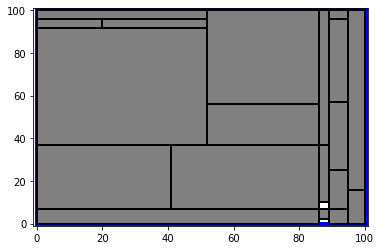

In [14]:
draw_pallet(W, H, items, exRes[3])

D:\yadisk\projects\pallet-packing\plots.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


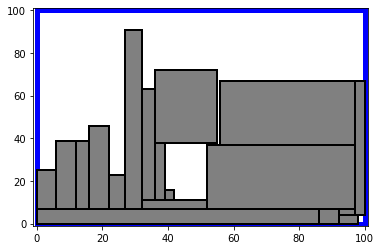

In [16]:
draw_pallet(W, H, items, skRes[1])

D:\yadisk\projects\pallet-packing\plots.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


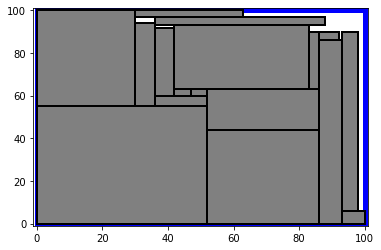

In [18]:
draw_pallet(W, H, items, skRes2[1])

In [9]:
print('Solver:')
print_efficiency(10, 10, items, task_one_model_adapter)
print('Skyline:')
skyline_decode_adapter = lambda w, h, its: skyline_decode(w, h, its, range(len(its)))
print_efficiency(10, 10, items, skyline_decode_adapter)

Solver:


KeyboardInterrupt: 